In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder       # instantiate labelencoder object
from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest   #feature selection best features
from sklearn.feature_selection import chi2         # clase chi-cuadrado 
from sklearn.feature_selection import f_classif, f_regression    #clase f_clasificador ANOVA
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import LogisticRegression, perceptron

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.externals import joblib

from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics 
pd.set_option('display.max_rows', 4706)

In [3]:
ds = pd.read_csv('/data/DWeb/inguat-backend/Inguat_isnull.csv')
ds

Unnamed: 0   SEC_INT  P1                                     P2$01  \
0              0   1010084  Si                     Vacaciones personales   
1              1   1010084  Si                     Vacaciones personales   
2              3   1010084  Si                     Vacaciones personales   
3              4   1010084  Si                     Vacaciones personales   
4              6   1010084  Si  Día de la independencia 15 de septiembre   
5              7   1010084  Si  Día de la independencia 15 de septiembre   
6              9   1010098  Si                    Noche buena (año 2017)   
7             10   1010098  Si                    Noche buena (año 2017)   
8             11   1010098  Si                    Noche buena (año 2017)   
9             12  27010024  Si                      Año nuevo (año 2017)   
10            13  27010024  Si                      Año nuevo (año 2017)   
11            14  27010024  Si                      Año nuevo (año 2017)   
12            15  27010024  Si                         Día de Esquipulas   
13            16  27010024  Si                         Día de Esquipulas   
14            18  27010024  Si                     Vacaciones personales   
15            19  27010024  Si                     Vacaciones personales   
16            21  27010024  Si              Día de los santos (año 2017)   
17            22  27010024  Si              Día de los santos (año 2017)   
18            24  27010024  Si                                  Carnaval   
19            25  27010024  Si                                  Carnaval   
20            27  28060051  Si                         Día de Esquipulas   
21            28  28060051  Si                         Día de Esquipulas   
22            29  28060051  Si                         Día de Esquipulas   
23            30  28060051  Si                            Día de trabajo   
24            31  28060051  Si                            Día de trabajo   
25            33  25010051  Si                    Noche buena (año 2017)   
26            34  25010051  Si                    Noche buena (año 2017)   
27            36  25010051  Si         Día de la revolución (20 Octubre)   
28            37  25010051  Si         Día de la revolución (20 Octubre)   
29            38  25010051  Si         Día de la revolución (20 Octubre)   
30            39  25010051  Si                     Vacaciones personales   
31            40  25010051  Si                     Vacaciones personales   
32            42  25010051  Si              Día de los santos (año 2017)   
33            43  25010051  Si              Día de los santos (año 2017)   
34            44  25010051  Si              Día de los santos (año 2017)   
35            45  26010012  Si                    Noche buena (año 2017)   
36            46  26010012  Si                    Noche buena (año 2017)   
37            47  26010012  Si                    Noche buena (año 2017)   
38            48  26010012  Si                            Día de trabajo   
39            49  26010012  Si                            Día de trabajo   
40            50  26010012  Si                            Día de trabajo   
41            51  26010012  Si                              Semana Santa   
42            52  26010012  Si                              Semana Santa   
43            54  26010012  Si                         Paseo / excursión   
44            55  26010012  Si                         Paseo / excursión   
45            57  26010012  Si                         Día de Esquipulas   
46            58  26010012  Si                         Día de Esquipulas   
47            60  26010012  Si         Día de la revolución (20 Octubre)   
48            61  26010012  Si         Día de la revolución (20 Octubre)   
49            62  26010012  Si         Día de la revolución (20 Octubre)   
50            63  26010012  Si                         Paseo / excursión   
51            64  26010012  Si                        

In [2]:
ds = ds.drop(ds.iloc[:,[0]], axis=1)
ds.shape

NameError: name 'ds' is not defined

In [5]:
class EncoderXY:
    def __init__(self, columns = None ):
        self.columns = columns    # lista de columnas a codificar

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        '''
        transforma las columnas de X especificadas en self.columns usando Label_encoder().
        Si no se especifica transforma todas las columans de X
        '''
        salida = X.copy()

        if self.columns is not None:
            for col in self.columns:
                salida[col] = LabelEncoder().fit_transform(salida[col])
        else:
            for colname, col in salida.items():
                salida[colname] = LabelEncoder().fit_transform(col)

        return salida

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [6]:
EncodLabel = EncoderXY()
X_le = EncodLabel.fit_transform(ds)  # codificando todo el dataset
X_le.head()

SEC_INT  P1  P2$01  P4  DEPTO_MUNI  P7_NO_PERNOC  P7_SI_PERNOC  \
0        1   0     14   0         102             2             6   
1        1   0     14   0         102             2             5   
2        1   0     14   0         102             2             9   
3        1   0     14   0         102             2             0   
4        1   0      3   0         102             2             9   

   P9_#EXCURSION  DEP_MUN_LUG  P11_MOTIVO_EXCURSION      ...       VIA_VIAJE  \
0              0          428                     1      ...               1   
1              0          428                     1      ...               0   
2              0          153                     1      ...               1   
3              0          153                     1      ...               0   
4              0          153                     1      ...               1   

   P18_#NOCHES1  P19_#PERSON1  P20_MOTIVO_1  P21_ALOJ_1  P22_PER_GAS_1  \
0             4             3             5           2              4   
1             1             3             5           3              4   
2             1             7             5           3              8   
3             1             3             5           3              4   
4             4             4             5           3              5   

   P24_VIAJE_ORG  P26_TRASPORTE  P27_DG_SUMA  P17_DESTINO1  
0              2              1          150          1131  
1              2              5            0           139  
2              2              5            0           157  
3              2              5            0           139  
4              2              5          280           690  

[5 rows x 28 columns]

In [7]:
X = X_le.drop(columns='DEP_MUN_LUG')  
y = X_le['DEP_MUN_LUG'].copy()  
y.head()

0    428
1    428
2    153
3    153
4    153
Name: DEP_MUN_LUG, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(2499, 27) (2499,)
(1072, 27) (1072,)


In [9]:
scaler = StandardScaler()
X_train_scalerfit = scaler.fit_transform(X_train)
X_test_scalertransf = scaler.transform(X_test)



/home/itsky/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/itsky/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/itsky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
rf = RandomForestClassifier(n_estimators = 10, criterion ='gini', random_state = 42)
rf.fit(X_train_scalerfit, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [245]:
factor = pd.factorize(ds['DEP_MUN_LUG'])
y_test_factorize  = factor[0]
definitions = factor[1]
#print(ds.DEP_MUN_LUG.head())
#
y_test_factorize

array([0, 0, 1, ..., 6, 6, 6])

## entrenando RF con y_test_rf (scaler)

In [12]:
X_train, X_test, y_train, y_test_rf = train_test_split(X, y_test_rf, test_size=0.3, random_state=42)  

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test_rf.shape)

(2499, 27) (2499,)
(1072, 27) (1072,)


In [13]:
scaler = StandardScaler()
X_train_scalerfit = scaler.fit_transform(X_train)
X_test_scalertransf = scaler.transform(X_test)

/home/itsky/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/itsky/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/itsky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
rf = RandomForestClassifier(n_estimators = 70, criterion ='entropy', random_state = 82)
rf.fit(X_train_scalerfit, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=None,
            oob_score=False, random_state=82, verbose=0, warm_start=False)

In [47]:
y_predRF = rf.predict(X_test_scalertransf)


In [183]:
accuracy = metrics.f1_score(y_test_rf, y_predRF, average='macro')
print('F1 Score -->>  ', accuracy)
mae = metrics.mean_absolute_error(y_test_rf, y_predRF)
print('Media Absoluto Error -->>  ', mae)
# Mean squared error (MSE)
mse = metrics.mean_squared_error(y_test_rf, y_predRF)
print('Error de Media al Cuadrado -->>  ', mse)

F1 Score -->>   0.7953579552286764
Media Absoluto Error -->>   27.325559701492537
Error de Media al Cuadrado -->>   9360.540111940298


/home/itsky/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/itsky/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [17]:
#reversefactor = dict(zip(range(571),definitions))
#y_test_rf = np.vectorize(reversefactor.get)(y_test)
#y_pred_rf = np.vectorize(reversefactor.get)(RFpred)
#pd.crosstab(y_test_rf, y_pred_rf, rownames=['Destino Actual'], colnames=['Destino Pronosticado'])
#list(y_pred_rf)


/home/itsky/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "middle right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


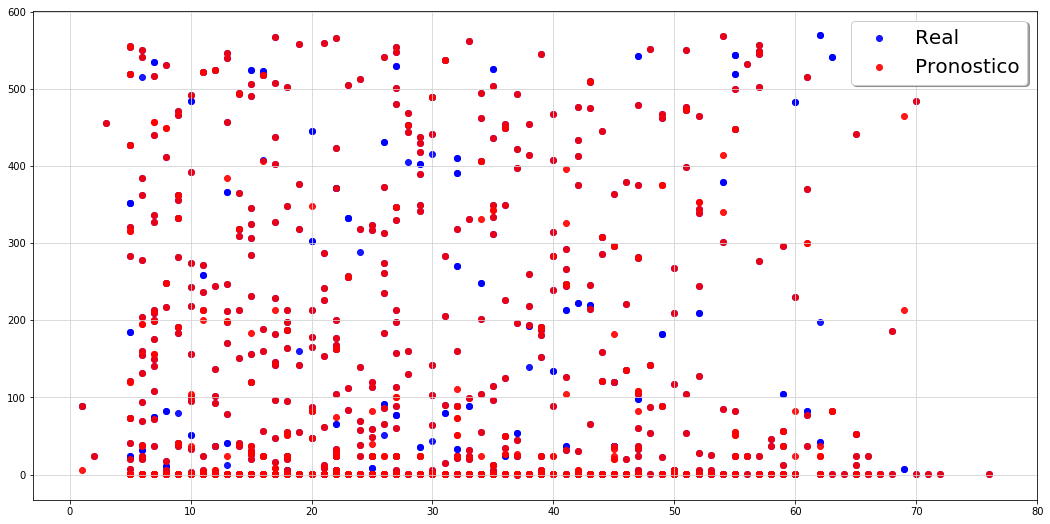

In [182]:
x_axis = X_test.EDAD

plt.scatter(x_axis, y_test_rf, c = 'b', alpha = 0.9, marker = 'o', label = 'Real')
plt.scatter(x_axis, y_predRF, c = 'r', alpha = 0.9, marker = 'o', label = 'Pronostico')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'middle right', fontsize=20, fancybox=True, shadow=True)
plt.rcParams["figure.figsize"] = 18,9


In [154]:
svc = SVC(C=2.0, cache_size=200, class_weight=None, coef0=40.0, decision_function_shape='ovo', degree=3, gamma=0.020, 
          kernel='poly',max_iter=-1, probability=True, random_state=12, shrinking=True,tol=0.00001, verbose=False)
svc.fit(X_train_scalerfit, y_train)
y_pred_svc = svc.predict(X_test_scalertransf)
print('Punteo de Precisión ==>>', accuracy_score(y_pred_svc, y_test_rf))

Punteo de Precisión ==>> 0.5848880597014925


/home/itsky/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "middle right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


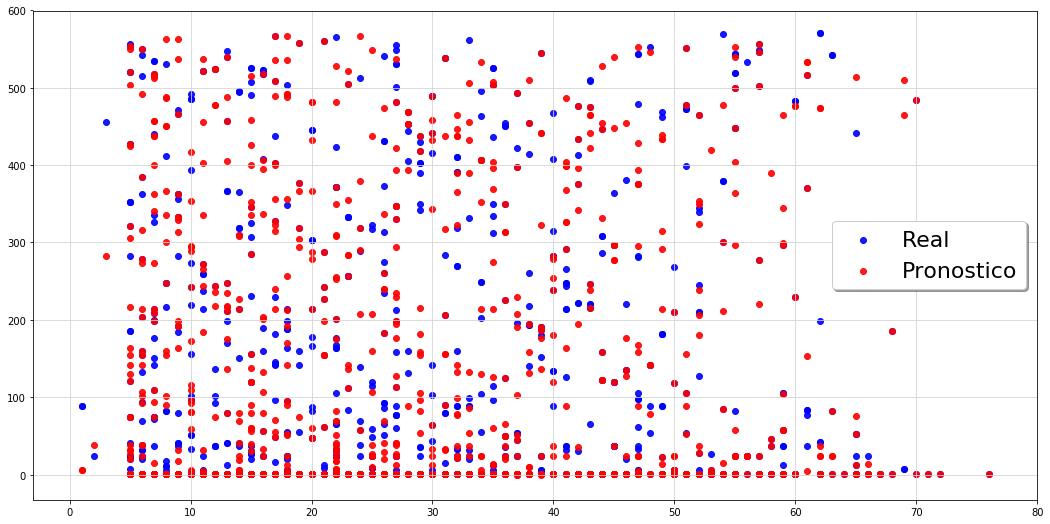

In [176]:
x_axis = X_test.EDAD
plt.scatter(x_axis, y_test_rf, c = 'b', alpha = 0.9, marker = 'o', label = 'Real')
plt.scatter(x_axis, y_pred_svc, c = 'r', alpha = 0.9, marker = 'o', label = 'Pronostico')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'middle right', fontsize=22, fancybox=True, shadow=True, ncol=1)
plt.rcParams["figure.figsize"] = 18,9

In [224]:
knn = KNeighborsClassifier(n_neighbors=255, weights='uniform', algorithm='brute', leaf_size=30, p=12, metric='minkowski', metric_params=None, 
                           n_jobs=25)
knn.fit(X_train_scalerfit, y_train)

y_pred_knn = knn.predict(X_test_scalertransf)

In [225]:
print('Punteo de Precisión ==>>', accuracy_score(y_pred_knn, y_test_rf))

Punteo de Precisión ==>> 0.439365671641791


/home/itsky/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "middle right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


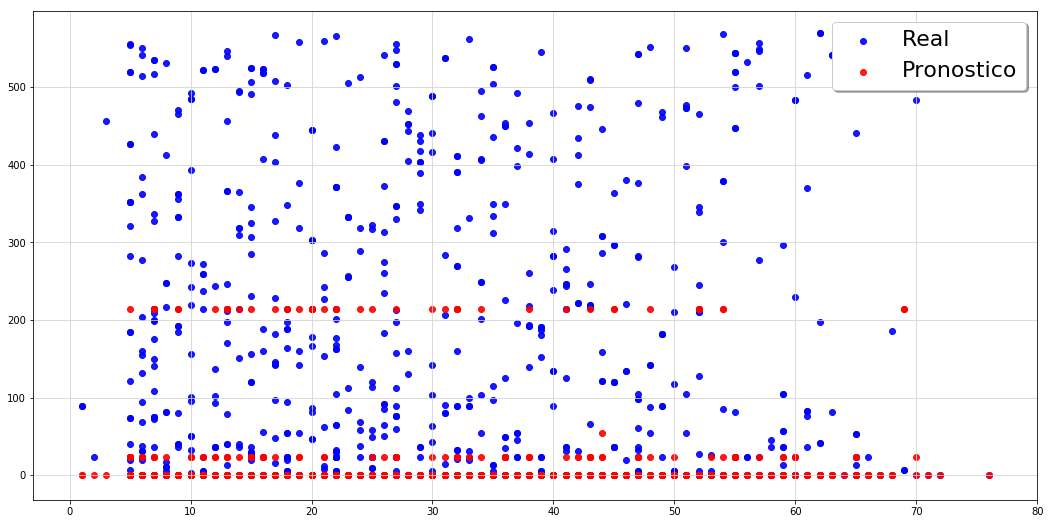

In [288]:
x_axis = X_test.EDAD
plt.scatter(x_axis, y_test_rf, c = 'b', alpha = 0.9, marker = 'o', label = 'Real')
plt.scatter(x_axis, y_pred_knn, c = 'r', alpha = 0.9, marker = 'o', label = 'Pronostico')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'middle right', fontsize=22, fancybox=True, shadow=True, ncol=1)
plt.rcParams["figure.figsize"] = 18,9

In [251]:
ds_scalerfit = scaler.fit_transform(X_le)  # X_le contiene todo el dataset codificado

/home/itsky/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/itsky/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [274]:
ds_scalerfit = pd.DataFrame(ds_scalerfit)
X_scalerfit = ds_scalerfit.drop(ds_scalerfit.loc[:,[8]])  
y_scalerfit = ds_scalerfit.loc[:,[8]].copy()  
y_scalerfit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 1 columns):
8    3571 non-null float64
dtypes: float64(1)
memory usage: 28.0 KB


In [300]:
Arrayprueba = [1070013,'Año nuevo (año 2017)',"Sí, es de familiares o amigos",'ESCUINTLA_SAN JOSE',3.0,1.0,1.0,'FALSO',"Ocio, recreo y/o vacaciones",500.0,4.0,1.0,11,20,'BACHILLER EN COMPUTACION','ESTUDIANTE','Masculino','Sí',1.0,2.0,'Religión y peregrinación','Hotel o similares',2.0,'Por su cuenta,Bus regional',860.0,'CHIQUIMULA_ESQUIPULAS_ESQUIPULAS']

#entrada1=EncodLabel.fit_transform(Arrayprueba)
ds.columns

Index(['SEC_INT', 'P1', 'P2$01', 'P4', 'DEPTO_MUNI', 'P7_NO_PERNOC',
       'P7_SI_PERNOC', 'P9_#EXCURSION', 'DEP_MUN_LUG', 'P11_MOTIVO_EXCURSION',
       'P13_GASTO_EXCURSION', 'P14_#PER_EXCURSION', 'P16_#EXCUR_CONPERNOC',
       'SUMA_PUNTOS', 'EDAD', 'PROFESION', 'OCUPACION', 'GENERO', 'VIA_VIAJE',
       'P18_#NOCHES1', 'P19_#PERSON1', 'P20_MOTIVO_1', 'P21_ALOJ_1',
       'P22_PER_GAS_1', 'P24_VIAJE_ORG', 'P26_TRASPORTE', 'P27_DG_SUMA',
       'P17_DESTINO1'],
      dtype='object')

In [293]:
prediction1 =rf.predict(Arrayprueba)
prediction1

ValueError: could not convert string to float: 'Año nuevo (año 2017)'

In [295]:
rf_model = 'rf_inguat_model.joblib.z'
joblib.dump(rf, rf_model)

['rf_inguat_model.joblib.z']